# Demo for ε-Differential Agreements

This demo shows how the ε-Differential Agreements in Seele's Neural Consensus Algorithm works. A lot of potential real-world issues have been greatly simplified such as faulty or unresponsive nodes. In addition, some more sophisticated factors that were not described in detail in the article, such as confidence percentage, varying sampling ratios, or decision making from multiple samples have not been considered. 

You can play around with all the customizable parameters immediately below; keep in mind that setting a very large sampling ratio or number of nodes may greatly increase compute time. 

**To run a cell in the notebook, press Shift + Enter. You will need to run and install the packages below (pandas, numpy, and matplotlib) first. This notebook is desgined to be executed in the order of the cells presented; a mixup in execution order may affect the results.**

For a quick guide to Jupyter Notebook, check out this [article](https://www.dataquest.io/blog/jupyter-notebook-tutorial/).

## Installation and Importing

In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

In [ ]:
!pip install matplotlib

In [2]:
# Import packages required for this demo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Customizable Parameters: Change These!

In [3]:
# Number of nodes in the network
num_nodes = 1000
# Correct order of transactions. You can change the number of transactions also by adding/removing elements from the list.
order = [0.1, 0.21, 0.27, 0.34, 0.5, 0.55, 0.59, 0.76, 0.82, 0.9]
# Standard deviation of Gaussian noise
noise = 0.3
# Colors for scatter plot
colors = cm.rainbow(np.linspace(0, 1, len(order)))
# Sampling ratio s
s = 0.03 
# Aggregation method, e.g. np.median, np.mean, np.min, np.max, etc
aggregator = np.median

## Data Generation

In [4]:
# Creates table LEDGER and generates Gaussian noise based on the correct order list above
# Each column is a different node, while each row is a different transaction value
ledger = pd.DataFrame(index = order, data = order)
for i in range(num_nodes): # Populates table by column
    ledger[i] = [value + np.random.normal(0, noise) for value in order]
ledger

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0.10,0.675268,-0.373320,0.208853,-0.053119,0.239245,0.446428,0.527075,0.211558,0.009225,-0.113264,...,0.391413,0.022865,0.351198,0.478544,-0.144917,0.577903,0.020802,-0.434653,0.430425,0.125742
0.21,0.097479,-0.080235,0.144245,0.481353,0.487444,0.011278,0.679760,0.440063,-0.122660,0.007879,...,0.541999,-0.286734,0.040687,0.295142,-0.142332,-0.034334,0.905523,-0.076715,0.103325,0.136177
0.27,0.408548,0.485816,0.351438,0.166251,0.236033,-0.397858,-0.111815,0.003809,0.011687,0.338712,...,0.472756,0.448725,-0.009436,-0.263644,0.089124,0.323737,0.044346,0.414407,0.153906,0.583093
0.34,0.407016,0.285989,0.604229,-0.178201,0.461668,0.258211,0.339277,0.400535,0.194885,0.584925,...,0.638172,0.492323,0.437360,0.545030,-0.206899,0.203044,0.108405,0.439295,0.584145,0.318020
0.50,0.391090,0.410944,0.292048,0.231104,0.771655,0.320250,0.209968,0.474746,0.745083,0.290486,...,0.230561,1.377232,0.697559,0.498198,0.264633,0.823350,0.698403,0.496177,0.634324,0.407945
0.55,0.759853,0.862570,0.208535,0.387813,0.548960,0.511966,0.183397,0.722868,0.263968,0.589442,...,0.245513,0.904357,0.141360,0.325583,0.794099,0.380627,0.991022,0.416224,0.889777,0.115571
0.59,1.059233,0.779755,0.447520,0.081343,0.065636,0.570877,0.809143,0.293207,0.804148,0.447663,...,0.616158,0.341910,0.221234,0.554584,0.432788,0.704843,0.306594,0.337542,0.825576,0.498415
0.76,0.083690,0.915367,0.917335,0.746593,0.934063,0.781100,0.704349,0.992801,-0.025506,1.006829,...,0.524660,0.713967,1.009756,1.211713,0.923209,0.224740,1.019145,0.878868,0.794358,1.437375
0.82,0.634916,0.128547,0.372872,0.430118,0.817706,0.786077,0.732313,0.681723,1.207322,0.548216,...,0.665734,1.143510,0.382569,1.078764,0.566222,1.292230,0.892452,0.842436,0.741094,1.086009
0.90,0.785678,0.971137,0.733879,0.285993,1.110485,1.338161,0.741494,1.241892,0.455855,0.742849,...,0.533875,1.213343,1.261766,0.828091,1.159801,1.282025,0.899802,0.736122,0.806359,1.008454


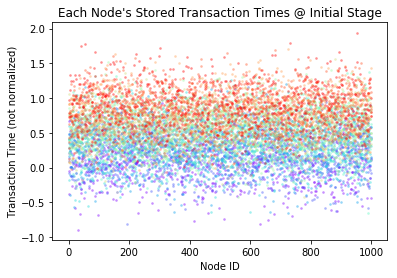

In [5]:
# Displays scatter plot of all current transactions' orders by each node

# Creates VALUES, a 2-D list with dimensions num_transactions * num_nodes
# VALUES: a list of each transactions' list of all recorded values
values = []
for name, row in ledger.iterrows():
    values += [row]

# Plots scatter
for txn, color in zip(values, colors):
    plt.scatter(x = ledger.columns, y = txn, alpha = 0.3, c = color, s=3)
plt.xlabel("Node ID")
plt.ylabel("Transaction Time (not normalized)")
plt.title("Each Node's Stored Transaction Times @ Initial Stage")


# Calculates epsilon for each transaction
ranges_init = [np.ptp(row) for name, row in ledger.iterrows()]

## Round 1

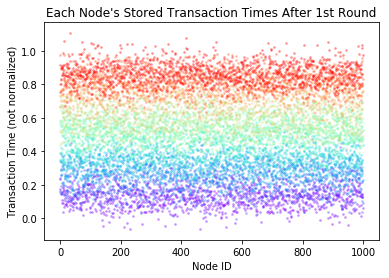

In [7]:
# Round 1 of EDA
to_update = [] # 2-D array that will store the new values for each node
for node in ledger.columns: # Iterates through all nodes; in theory this would be done distributedly in parallel
    # Randomly generates a list of s% of nodes to sample
    sampled_nodes = np.random.choice(ledger.columns, int(s * len(ledger.columns)))
    
    # RESULTS: 2D-list that stores all results collected from the sampled nodes
    results = [[] for i in range(len(order))]  
    for sample in sampled_nodes:
        for (index, val) in zip(order, results):
            val += [ledger.loc[index, sample]]
    
    # Aggregates values from RESULTS into a 1-D list using the AGGREGATOR function
    new_values = [aggregator(l) for l in results]
    
    # Stores the aggregated values to TO_UPDATE, which will update LEDGER at the end of the round
    to_update += [new_values]

# Updates LEDGER from TO_UPDATE, so that all nodes now store their new aggregated values
for node, new_val in zip(ledger.columns, to_update):
    ledger[node] = new_val

    
# Plots scatter; see above scatter plot code for comments
values = []
for name, row in ledger.iterrows():
    values += [row]
for txn, color in zip(values, colors):
    plt.scatter(x = ledger.columns, y = txn, alpha = 0.3, c = color, s=3)
plt.xlabel("Node ID")
plt.ylabel("Transaction Time (not normalized)")
plt.title("Each Node's Stored Transaction Times After 1st Round")


# Calculates epsilon for each transaction
ranges_round1 = [np.ptp(row) for name, row in ledger.iterrows()]

## Round 2

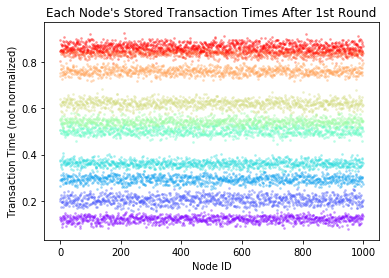

In [8]:
# Round 2 of EDA
to_update = [] # 2-D array that will store the new values for each node
for node in ledger.columns: # Iterates through all nodes; in theory this would be done distributedly in parallel
    # Randomly generates a list of s% of nodes to sample
    sampled_nodes = np.random.choice(ledger.columns, int(s * len(ledger.columns)))
    
    # RESULTS: 2D-list that stores all results collected from the sampled nodes
    results = [[] for i in range(len(order))]  
    for sample in sampled_nodes:
        for (index, val) in zip(order, results):
            val += [ledger.loc[index, sample]]
    
    # Aggregates values from RESULTS into a 1-D list using the AGGREGATOR function
    new_values = [aggregator(l) for l in results]
    
    # Stores the aggregated values to TO_UPDATE, which will update LEDGER at the end of the round
    to_update += [new_values]

# Updates LEDGER from TO_UPDATE, so that all nodes now store their new aggregated values
for node, new_val in zip(ledger.columns, to_update):
    ledger[node] = new_val

    
# Plots scatter; see above scatter plot code for comments
values = []
for name, row in ledger.iterrows():
    values += [row]
for txn, color in zip(values, colors):
    plt.scatter(x = ledger.columns, y = txn, alpha = 0.3, c = color, s=3)
plt.xlabel("Node ID")
plt.ylabel("Transaction Time (not normalized)")
plt.title("Each Node's Stored Transaction Times After 1st Round")


# Calculates epsilon for each transaction
ranges_round1 = [np.ptp(row) for name, row in ledger.iterrows()]

## Round 3

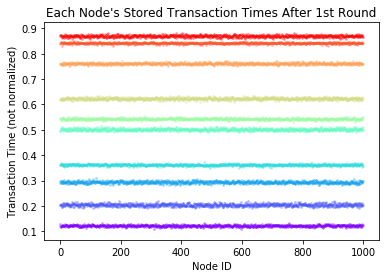

In [9]:
# Round 3 of EDA
to_update = [] # 2-D array that will store the new values for each node
for node in ledger.columns: # Iterates through all nodes; in theory this would be done distributedly in parallel
    # Randomly generates a list of s% of nodes to sample
    sampled_nodes = np.random.choice(ledger.columns, int(s * len(ledger.columns)))
    
    # RESULTS: 2D-list that stores all results collected from the sampled nodes
    results = [[] for i in range(len(order))]  
    for sample in sampled_nodes:
        for (index, val) in zip(order, results):
            val += [ledger.loc[index, sample]]
    
    # Aggregates values from RESULTS into a 1-D list using the AGGREGATOR function
    new_values = [aggregator(l) for l in results]
    
    # Stores the aggregated values to TO_UPDATE, which will update LEDGER at the end of the round
    to_update += [new_values]

# Updates LEDGER from TO_UPDATE, so that all nodes now store their new aggregated values
for node, new_val in zip(ledger.columns, to_update):
    ledger[node] = new_val

    
# Plots scatter; see above scatter plot code for comments
values = []
for name, row in ledger.iterrows():
    values += [row]
for txn, color in zip(values, colors):
    plt.scatter(x = ledger.columns, y = txn, alpha = 0.3, c = color, s=3)
plt.xlabel("Node ID")
plt.ylabel("Transaction Time (not normalized)")
plt.title("Each Node's Stored Transaction Times After 1st Round")


# Calculates epsilon for each transaction
ranges_round1 = [np.ptp(row) for name, row in ledger.iterrows()]

## Round 4

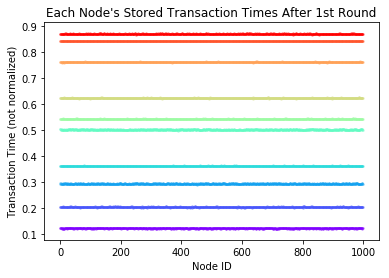

In [10]:
# Round 4 of EDA
to_update = [] # 2-D array that will store the new values for each node
for node in ledger.columns: # Iterates through all nodes; in theory this would be done distributedly in parallel
    # Randomly generates a list of s% of nodes to sample
    sampled_nodes = np.random.choice(ledger.columns, int(s * len(ledger.columns)))
    
    # RESULTS: 2D-list that stores all results collected from the sampled nodes
    results = [[] for i in range(len(order))]  
    for sample in sampled_nodes:
        for (index, val) in zip(order, results):
            val += [ledger.loc[index, sample]]
    
    # Aggregates values from RESULTS into a 1-D list using the AGGREGATOR function
    new_values = [aggregator(l) for l in results]
    
    # Stores the aggregated values to TO_UPDATE, which will update LEDGER at the end of the round
    to_update += [new_values]

# Updates LEDGER from TO_UPDATE, so that all nodes now store their new aggregated values
for node, new_val in zip(ledger.columns, to_update):
    ledger[node] = new_val

    
# Plots scatter; see above scatter plot code for comments
values = []
for name, row in ledger.iterrows():
    values += [row]
for txn, color in zip(values, colors):
    plt.scatter(x = ledger.columns, y = txn, alpha = 0.3, c = color, s=3)
plt.xlabel("Node ID")
plt.ylabel("Transaction Time (not normalized)")
plt.title("Each Node's Stored Transaction Times After 1st Round")


# Calculates epsilon for each transaction
ranges_round1 = [np.ptp(row) for name, row in ledger.iterrows()]

## ε Over the Rounds

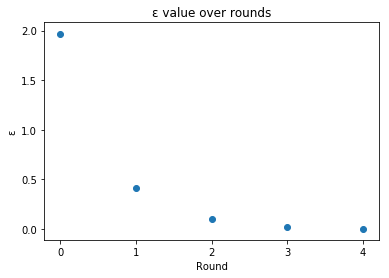

In [9]:
# Creates table of epsilon values in different transactions over the rounds
epsilons = pd.DataFrame(data = {0: ranges_init, 1: ranges_round1, 2: ranges_round2, 3: ranges_round3, 4: ranges_round4})

# Calculates the average of the epsilon values per round
means = []
for col in epsilons.columns:
    means += [np.mean(epsilons[col])]

# Plots epsilon values over rounds
plt.scatter(x=[0,1,2,3,4], y=means)
plt.xlabel("Round")
plt.ylabel("ε")
plt.xticks(np.arange(0, 5))
plt.title("ε value over rounds")
plt.show()

## Worst ε

In [11]:
# Calculates worst epsilon out of all the transactions and nodes
worst_differences = []
for index, (name, row) in zip(range(ledger.shape[0]), ledger.iterrows()): # Iterates through transactions
    actual = order[index]
    worst_differences += [max(abs(row - actual))] # Epsilon value for the node with the highest epsilon
max(worst_differences)

0.02299916442095684